## Image Transforms

> skip_exec: true


In [ ]:
import math
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage import data
from skimage.transform import ProjectiveTransform, SimilarityTransform, warp

pd.set_option("display.max_columns", None)

PROJECT_ROOT = Path.cwd().parent.parent

plt.rcParams["figure.facecolor"] = (1, 1, 1, 0)  # RGBA tuple with alpha=0
plt.rcParams["axes.facecolor"] = (1, 1, 1, 0)  # RGBA tuple with alpha=0


## Load and display image


In [ ]:
img = data.text()

In [ ]:
print(img.shape)

img

(172, 448)


array([[ 91,  94,  99, ..., 135, 135, 134],
       [ 99, 104, 104, ..., 141, 141, 139],
       [105, 109, 109, ..., 145, 142, 141],
       ...,
       [146, 146, 141, ..., 142, 142, 142],
       [144, 140, 141, ..., 146, 141, 136],
       [145, 136, 143, ..., 143, 134, 126]], dtype=uint8)

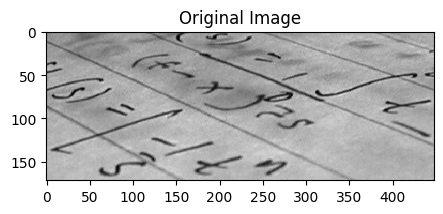

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(img, cmap="gray")
ax.set_title("Original Image")
plt.show()


## Basic geometric transformation


We can use scikit-image to transform images in various ways. For instance we can rotate an image 90 degrees like so:


In [ ]:
tform = SimilarityTransform(
    scale=1,
    rotation=math.pi / 4,
    translation=(img.shape[0] / 2, -100),
)
print(tform.params)

[[   0.70710678   -0.70710678   86.        ]
 [   0.70710678    0.70710678 -100.        ]
 [   0.            0.            1.        ]]


In [ ]:
rotated = warp(img, tform)

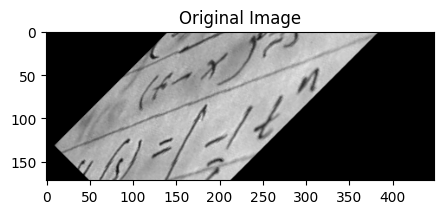

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(rotated, cmap="gray")
ax.set_title("Original Image")
plt.show()

## Parameter estimation


Often however we will know what we want the final image to look like but not know what transformation parameters will achieve that. We can estimate the parameters using the least squares method. This can amongst other things be used for image registration or rectification, where you have a set of control points or homologous/corresponding points in two images.

Let’s assume we want to recognize letters on a photograph which was not taken from the front but at a certain angle. In the simplest case of a plane paper surface the letters are projectively distorted. Simple matching algorithms would not be able to match such symbols. One solution to this problem would be to warp the image so that the distortion is removed and then apply a matching algorithm.


The sckit-image API is a little bit counter-intuitive. I think of the problem as being about "lifting" the image into a new projection. So I would think of the coordinates on the original image as being the source.

However, sckit-image thinks in terms of defining a mapping from a "canonical" or "standard" shape to a desired transformed shape. So the coordinates on the original image are actually the destination. Let's plot them now:


In [ ]:
dst = np.array(
    [
        [155, 15],
        [65, 40],
        [260, 130],
        [360, 95],
    ]
)


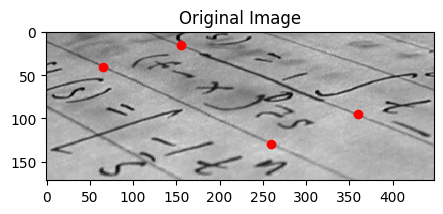

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(img, cmap="gray")
ax.plot(dst[:, 0], dst[:, 1], "ro")
ax.set_title("Original Image")
plt.show()


The source coordinates are the four corners of the desired image.


In [ ]:
src = np.array(
    [
        [0, 0],
        [0, 50],
        [300, 50],
        [300, 0],
    ]
)


We can now initialse a ProjectiveTransform. The `estimate` method then finds a transformation matrix that maps points from `src` to `dst`. The `warp` method takes the original image and applies the transformation.


In [ ]:
tform = ProjectiveTransform()
tform.estimate(src, dst)
warped = warp(img, tform, output_shape=img.shape)


In [ ]:
warped.shape


(172, 448)

We can now visualise the image and we see that the image has been warped such that the points that were at the `dst` coordinates are now at the `src` coordinates.


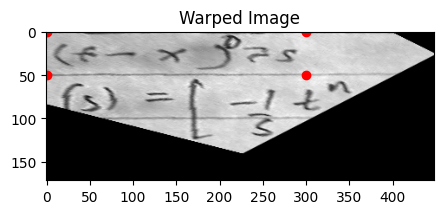

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(warped, cmap="gray")
ax.plot(src[:, 0], src[:, 1], "ro")
ax.set_title("Warped Image")
plt.show()


We could if we wanted to adjust the output shape to just contain the area within the coordinates.


In [ ]:
warped = warp(img, tform, output_shape=(50, 300))


This way we have effectively lifted that one line of text off the page and flattened it out.


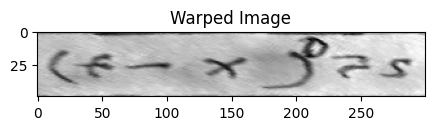

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(warped, cmap="gray")
ax.set_title("Warped Image")
plt.show()
